# Slosh Analytical Calculations for a Closed Tank

Copyright 2023 Moran Innovation LLC

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

CryoFM™ is a trademark of Moran Innovation LLC. All rights reserved.

Ref: Ludwig, et al., “Pressure Variations in a Cryogenic Liquid Storage Tank Subjected to Periodic Excitations”, Intl Journal of Heat and Mass Transfer 66 (2013) 223-234

Note: CoolProp doesn't support transport properties for parahydrogen or methane, so viscosity and conductivity are provided as input using NIST RefProp look-up values.

## Verification Cases from Ludwig, et al.

### Nitrogen Tests (cylindrical tank)

#### Inputs for Nitrogen Sloshing Tests E1 through E5

In [1]:
import math

fluid = 'Nitrogen'
gasconstsp = 296.8  # J/kg-K gas constant, specific (Rs)
radius_tank = 0.148  # m, cylindrical tank radius (R)
area_inter = math.pi * (radius_tank)**2  # m^2, liquid interface area (S)
volume_tank = 0.043  # m^3, tank volume (V)
volume_ullage = 0.01333  # m^3, ullage volume at 69% volumetric fill level (Vu)
temp_liq = 77.6  # K, bulk liquid temperature (Tl; saturated at 1 atm)

#### Test E2 Specific Inputs (stable planar wave sloshing)

In [2]:
case = 'LN2 Test E2, Ludwig et al.'

# Fluid conditions immediately prior to start of sloshing
temp_vap_init = 161.  # K, initial mean vapor temperature (Tv,i)
press_init = 2.422e5  # Pa, tank pressure at start of sloshing (ts,o)
diffus_sat = 7.9916e-8  # m^2/s, thermal diffusivity (Do)
visc_kinsat = 15.495e-8  # m^2/s, kinematic viscosity, sat at initial pressure
visc_kinliq = 19.803e-8  # m^2/s, kinematic viscosity at liquid temp & pressure

# Sloshing parameters (sinuisoidal and parallel to liquid interface)
freq = 1.49  # Hz, slosh frequency (f)
freq1 = 1.757  # Hz, 1st mode natural frequency (f1)
ampl_forcing = 5.1e-3  # m, forcing amplitude (Af)
angfreq_nat1 = 11.04  # 1/s, first natural angular frequency (w1)
ang_wave_freq = 2 * math.pi * freq  # rad/s, angular wave frequency (w)
ratio_wave_freq = ang_wave_freq / angfreq_nat1 # (w/w1)

# Planar slosh wave height estimate, m
wave_height = ampl_forcing * (2 * ratio_wave_freq**2 /(1 - ratio_wave_freq**2))

# Mean vapor temperature change rate during slosh
dtemp_dtime_vap = 0.  # K/s, vapor temperature change rate

# Test time inputs (pressurization starts at 0)
time_press_final = 52.7  # s, pressurization time
time_slosh_start = 203.8  # s, sloshing start time
time_final = 485.1  # s, end of sloshing including decay time
time_model = 209.  # s, pressure drop begins (estimated from test data)

# Transient calculation settings
slosh_time = 0.0 # s, initialize to start of sloshing pressure drop
time_step = 0.1  # s, time increment for each iteration
stop_time = 31.2  # s, final calculation time
results_interval = 5 # s, time interval for printing transient results

#### Test E4 Specific Inputs (chaotic wave sloshing)

In [11]:
case = 'LN2 Test E4, Ludwig et al.'

# Fluid conditions immediately prior to start of sloshing
temp_vap_init = 159.  # K, initial mean vapor temperature (Tv,i)
press_init = 2.475e5  # Pa, tank pressure at start of sloshing (ts,o)
diffus_sat = 7.9677e-8  # m^2/s, thermal diffusivity (Do)
visc_kinsat = 15.397e-8  # m^2/s,  kinematic viscosity, sat at initial pressure
visc_kinliq = 19.805e-8  # m^2/s, kinematic viscosity at liquid temp & pressure

# Sloshing parameters (sinuisoidal and parallel to liquid interface)
freq = 1.65  # Hz, slosh frequency (f)
freq1 = 1.757  # Hz, 1st mode natural frequency (f1)
ampl_forcing = 5.1e-3  # m, forcing amplitude (Af)
angfreq_nat1 = 11.04  # 1/s, first natural angular frequency (w1)
ang_wave_freq = 2 * math.pi * freq  # rad/s, angular wave frequency (w)
ratio_wave_freq = ang_wave_freq / angfreq_nat1 # (w/w1)

# Chaotic slosh wave height estimate, m
accel = 9.80665  # m/s^2, acceleration
wave_height = accel / ang_wave_freq**2

# Mean vapor temperature change rate during slosh
dtemp_dtime_vap = -2.7  # K/s, vapor temperature change rate

# Test time inputs (pressurization starts at 0)
time_press_final = 55.4  # s, pressurization time
time_slosh_start = 207.4  # s, sloshing start time plus 
time_final = 447.6  # s, end of sloshing including decay time
time_model = 211.5  # s, pressure drop begins (estimated from test data)

# Transient calculation settings
slosh_time = 0.0 # s, initialize to start of sloshing pressure drop
time_step = 0.1  # s, time increment for each iteration
stop_time = 9.9  # s, final calculation time
results_interval = 1 # s, time interval for printing transient results

### Hydrogen Tests (spherical tank)

Notes:
* Inputs for the LH2 tests from Ludwig et al. differed from reference report in some cases
* Unreported parameters were calculated based on a spherical tank of radius 0.746 m
* Nu result in Table 5 appears to use Re critical of 7228 for test 869 and 5899 for test 870 rather than the constant 4000 depicted in the Fig 11 curve fit

#### Inputs for Hydrogen Sloshing Tests 869 and 870

In [1]:
import math

fluid = 'Parahydrogen'
gasconstsp = 4157.2  # J/kg-K gas constant, specific (Rs)
radius_tank = 0.746  # m, cylindrical tank radius (R)
volume_tank = 4 / 3 * math.pi * radius_tank**3  # m^3, tank volume (V)
temp_vap_init = 40.  # K, initial mean vapor temperature (Tv,i)

#### Test 869 Specific Inputs (stable planar wave sloshing)

In [2]:
import CoolProp.CoolProp as cp
import CryoFM as cfm

case = 'LH2 Test 869, Moran et al.'

# Liquid height, ullage volume, and liquid interface area
height_liq = 0.918  # m, based on 67% volumetric fill (33% ullage)
volume_ullage = 0.33 * volume_tank  # m^3, ullage volume
area_inter = cfm.sphere_area_inter(radius_tank, height_liq)  # m^2

# Liquid bulk temperature and pressure before slosh start
temp_liq = cp.PropsSI('T', 'P', 106179, 'Q', 0, fluid)  # K, sat at 15.4 psia
press_init = 2.43e5  # Pa, tank pressure at start of sloshing (ts,o)

# Fluid conditions immediately prior to start of sloshing
diffus_sat = 12.855e-8   # m^2/s, thermal diffusivity (Do) at 250 kPa
visc_kinsat = 15.439e-8  # m^2/s, kinematic viscosity, sat at 250 kPa
visc_kinliq = 18.777e-8  # m^2/s, kinematic viscosity at liquid temp & 250 kPa

# Sloshing parameters (sinuisoidal and parallel to liquid interface)
ratio_wave_freq = 1.64 # (w/w1)
freq = 0.95  # Hz, slosh frequency (f)
ang_wave_freq = 2 * math.pi * freq  # rad/s, angular wave frequency (w)
ampl_forcing = 1.27e-2  # m, forcing amplitude (Af)
freq1 = freq / ratio_wave_freq  # Hz, 1st mode natural freq using Table 5 (f1)

# Planar slosh wave height estimate, m
wave_height = 0.06 * radius_tank  # m, based on b/R from Table 5

# Mean vapor temperature change rate during slosh
dtemp_dtime_vap = 0.  # K/s, vapor temperature change rate

# Test time inputs (pressurization starts at 0)
time_press_final = 13.  # s, pressurization time
time_slosh_start = 41.  # s, sloshing start time
time_final = 300.  # s, end of sloshing test
time_model = 50.  # s, pressure drop begins (estimated from test data)

# Transient calculation settings
slosh_time = 0.0 # s, initialize to start of sloshing pressure drop
time_step = 0.1  # s, time increment for each iteration
stop_time = 50.  # s, final calculation time
results_interval = 5 # s, time interval for printing transient results

#### Test 870 Specific Inputs (chaotic wave sloshing)

In [2]:
import CoolProp.CoolProp as cp
import CryoFM as cfm

case = 'LH2 Test 870, Moran et al.'

# Liquid height, ullage volume, and liquid interface area
height_liq = 0.887  # m, based on 67% volumetric fill (33% ullage)
volume_ullage = 0.36 * volume_tank  # m^3, ullage volume
area_inter = cfm.sphere_area_inter(radius_tank, height_liq)  # m^2

# Liquid bulk temperature and pressure before slosh start
temp_liq = cp.PropsSI('T', 'P', 100663, 'Q', 0, fluid)  # K, sat at 15.4 psia
press_init = 2.43e5  # Pa, tank pressure at start of sloshing (ts,o)

# Fluid conditions immediately prior to start of sloshing
diffus_sat = 12.855e-8   # m^2/s, thermal diffusivity (Do) at 250 kPa
visc_kinsat = 15.439e-8  # m^2/s, kinematic viscosity, sat at 250 kPa
visc_kinliq = 19.003e-8  # m^2/s, kinematic viscosity at liquid temp & 250 kPa

# Sloshing parameters (sinuisoidal and parallel to liquid interface)
ratio_wave_freq = 1.3 # (w/w1)
freq = 0.74  # Hz, slosh frequency (f)
ang_wave_freq = 2 * math.pi * freq  # rad/s, angular wave frequency (w)
ampl_forcing = 3.81e-2  # m, forcing amplitude (Af)
freq1 = freq / ratio_wave_freq  # Hz, 1st mode natural freq using Table 5 (f1)

# Chaotic slosh wave height estimate, m
wave_height = 0.6 * radius_tank  # m, based on b/R from Table 5

# Mean vapor temperature change rate during slosh (see Table 4)
dtemp_dtime_vap = -0.45  # K/s, empirical vapor temperature change rate

# Test time inputs (pressurization starts at 0)
time_press_final = 14.  # s, pressurization time
time_slosh_start = 41.  # s, sloshing start time
time_final = 300.  # s, end of sloshing test
time_model = 50.  # s, pressure drop begins (estimated from test data)

# Transient calculation settings
slosh_time = 0.0 # s, initialize to start of sloshing pressure drop
time_step = 0.1  # s, time increment for each iteration
stop_time = 13.9  # s, final calculation time
results_interval = 1 # s, time interval for printing transient results

## Sloshing Analytical Calculations

In [3]:
import math
import CoolProp.CoolProp as cp
import CryoFM as cfm

# Initialization of parameters
pressure = press_init  # Pa, tank pressure
press_last = press_init # Pa, tank pressure at last time step
temp_vap = temp_vap_init # K, mean vapor temp at current time step
temp_vap_last = temp_vap_init # K, mean vapor temp at last time step
cond_velm_last = 0.  # m/s, greatest condensation velocity
condense_ratem = 0.  # kg/s, greatest condensation rate
condense_ratem_last = 0.
condense_amt = 0.  # kg, cumulative vapor condensed during sloshing
results_ctr = 0  # time step counter for printing results
i = -1  # index for interface area

# Initial saturated fluid properties (0 is liquid, 1 is vapor)
press_eval = press_init
temp_sat = cp.PropsSI('T', 'P', press_eval, 'Q', 0, fluid) # K
density_liqsat = cp.PropsSI('D', 'P', press_eval, 'Q', 0, fluid) # kg/m^3
density_vapsat = cp.PropsSI('D', 'P', press_eval, 'Q', 1, fluid) # kg/m^3
cp_liqsat = cp.PropsSI('C', 'P', press_eval, 'Q', 0, fluid) # J/kg-K
enthal_liqsat = cp.PropsSI('H', 'P', press_eval, 'Q', 0, fluid) # J/kg
enthal_vapsat = cp.PropsSI('H', 'P', press_eval, 'Q', 1, fluid) # J/kg
latent_heat = enthal_vapsat - enthal_liqsat  # J/kg

# Initial liquid properties
press_eval = press_init  # Pa, set pressure to evaluate fluid properties
temp_eval = temp_liq  # K, set temperature to evaluate fluid properties
dens_liq = cp.PropsSI('D', 'P', press_eval, 'T', temp_eval, fluid) #kg/m^3
cp_liq = cp.PropsSI('C', 'P', press_eval, 'T', temp_eval, fluid) # J/kg-K

# Initial thermal gradient thickness (liquid), critical slosh Reynolds number
grad_init = cfm.init_grad_thick(diffus_sat, time_model) # m
reynolds_crit = 4000.  # +/-20% according to Ludwig, et al.

# Print initial conditions right before slosh start
print(case)
print("slosh time =", "{:.1f}".format(slosh_time), "s")
print("experiment time =", "{:.1f}".format(time_model, "s"))
print("pressure =", "{:.3e}".format(pressure), "Pa")  
print("")

### Sloshing calculations ###

reynolds_slosh = cfm.slosh_reynolds(ang_wave_freq, wave_height, visc_kinliq)
nusselt_slosh = cfm.slosh_nusselt(reynolds_slosh, reynolds_crit)
diffus_eff = nusselt_slosh * diffus_sat  # eff diffusivity during slosh
delta_tslosh = cfm.tslosh_delta(grad_init,nusselt_slosh,diffus_sat)

while slosh_time < stop_time:
    
    # Increment slosh time, model time, and results print counter
    slosh_time += time_step  # s, elapsed time since slosh start
    time_model += time_step # s, time since pressurization start
    results_ctr += time_step

    # Saturated fluid properties (0 is liquid, 1 is vapor)
    press_eval = pressure
    density_liqsat = cp.PropsSI('D', 'P', press_eval, 'Q', 0, fluid) # kg/m^3
    density_vapsat = cp.PropsSI('D', 'P', press_eval, 'Q', 1, fluid) # kg/m^3
    cp_liqsat = cp.PropsSI('C', 'P', press_eval, 'Q', 0, fluid) # J/kg-K
    enthal_liqsat = cp.PropsSI('H', 'P', press_eval, 'Q', 0, fluid) # J/kg
    enthal_vapsat = cp.PropsSI('H', 'P', press_eval, 'Q', 1, fluid) # J/kg
    latent_heat = enthal_vapsat - enthal_liqsat  # J/kg

    # Interfacial mass transfer
    jakob = cfm.slosh_jakob(dens_liq, cp_liq, temp_sat, temp_liq, 
                            density_vapsat, latent_heat)
    condense_vel = cfm.slosh_condense_vel(nusselt_slosh, diffus_sat, jakob,
                   slosh_time, delta_tslosh)
    cond_velm = min(condense_vel, cond_velm_last)
    evap_vel = 0.1 * condense_vel
    condense_rate = density_vapsat * area_inter * (condense_vel - evap_vel)
    condense_ratem = min(condense_rate, condense_ratem_last) 
    condense_amt = condense_amt + condense_rate * time_step

    # Pressure (eqn 13) and vapor temperature calculations at current time step

    temp_vap = temp_vap_last + dtemp_dtime_vap * time_step
    pressure = cfm.slosh_pressure(press_init, temp_vap, temp_vap_init, 
                                  gasconstsp, density_vapsat, volume_ullage, 
                                  jakob, area_inter, nusselt_slosh, diffus_sat, 
                                  slosh_time, delta_tslosh, evap_vel)
    dp_dt = (pressure - press_last) / time_step

    # Determine max pressure drop rate (see table 4 for description)
    maxdp_time = cfm.slosh_maxdp_time(freq, freq1)
    if slosh_time > maxdp_time:  # time period of max pressure drop
        dpdt_max = (press_last - press_init) / (slosh_time - time_step) / 1000.
        cond_velm = condense_vel

    # Save pressure, vapor temp, and max condensation for next time step
    press_last = pressure
    temp_vap_last = temp_vap
    cond_velm_last = cond_velm
    condense_ratem_last = condense_ratem

    # Print results at selected time intervals
    if results_ctr > (results_interval - time_step):
        print("slosh time =", "{:.1f}".format(slosh_time), "s")
        print("experiment time =", "{:.1f}".format(time_model, "s"))
        print("condensation velocity =", "{:.3e}".format(condense_vel), "m/s")      
        print("condensation rate =", "{:.3e}".format(condense_rate), "kg/s")
        print("depress rate =", "{:.3e}".format(dp_dt), "Pa/s")
        print("pressure =", "{:.3e}".format(pressure), "Pa")  
        print("")
        results_ctr = 0 # reset results print counter

LH2 Test 870, Moran et al.
slosh time = 0.0 s
experiment time = 50.0
pressure = 2.430e+05 Pa

slosh time = 1.0 s
experiment time = 51.0
condensation velocity = -3.793e-03 m/s
condensation rate = -1.666e-02 kg/s
depress rate = -8.041e+03 Pa/s
pressure = 2.333e+05 Pa

slosh time = 2.0 s
experiment time = 52.0
condensation velocity = -2.962e-03 m/s
condensation rate = -1.263e-02 kg/s
depress rate = -6.686e+03 Pa/s
pressure = 2.261e+05 Pa

slosh time = 3.0 s
experiment time = 53.0
condensation velocity = -2.544e-03 m/s
condensation rate = -1.056e-02 kg/s
depress rate = -6.009e+03 Pa/s
pressure = 2.198e+05 Pa

slosh time = 4.0 s
experiment time = 54.0
condensation velocity = -2.285e-03 m/s
condensation rate = -9.249e-03 kg/s
depress rate = -5.585e+03 Pa/s
pressure = 2.141e+05 Pa

slosh time = 5.0 s
experiment time = 55.0
condensation velocity = -2.107e-03 m/s
condensation rate = -8.324e-03 kg/s
depress rate = -5.288e+03 Pa/s
pressure = 2.086e+05 Pa

slosh time = 6.0 s
experiment time = 56.0

## Pressure Response for Verification Cases (Test vs Models)

### Nitrogen

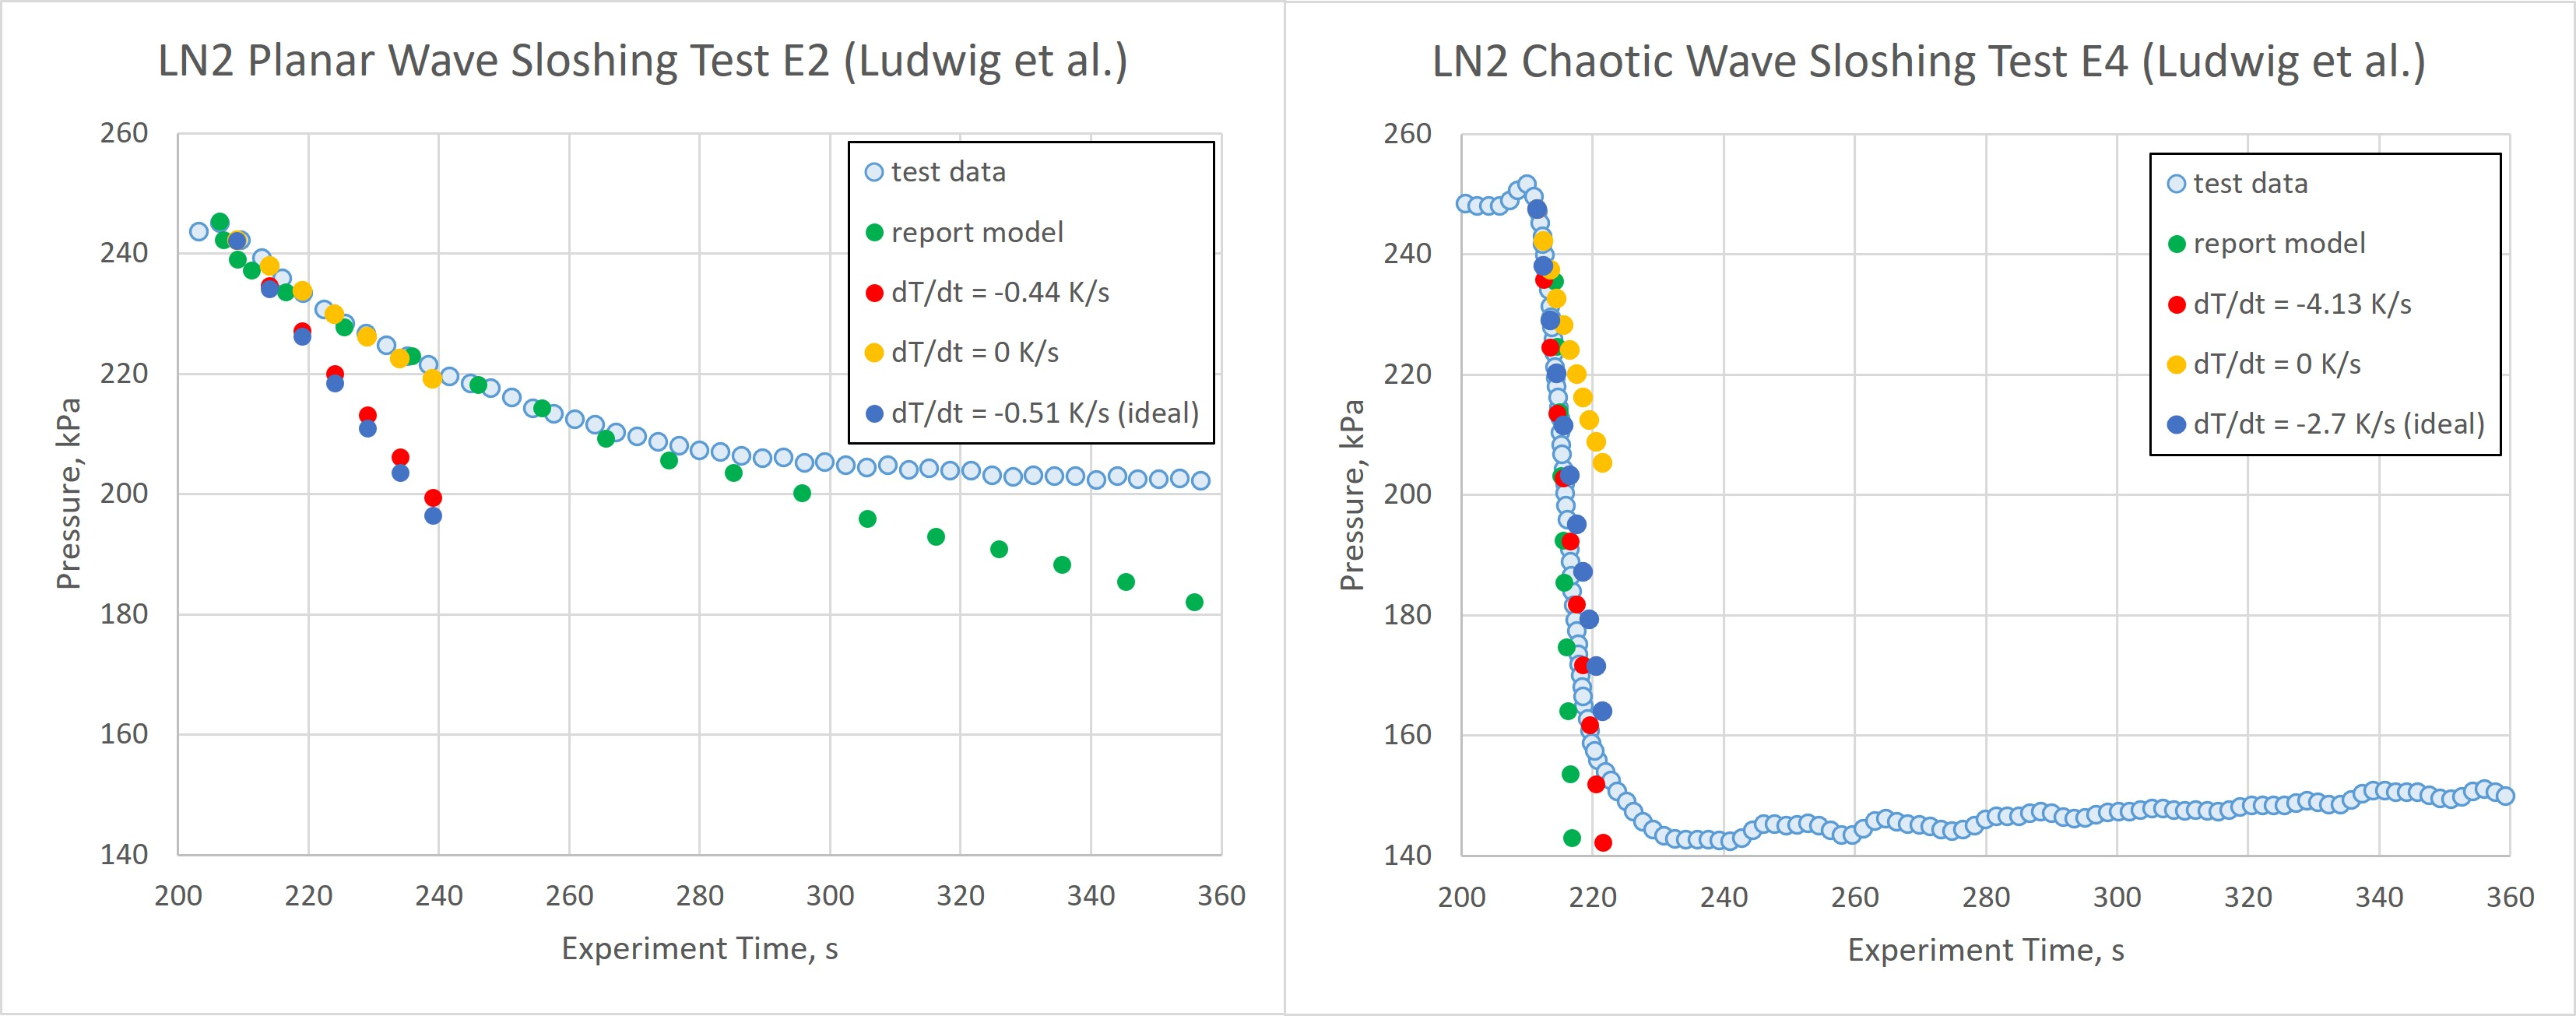

### Hydrogen

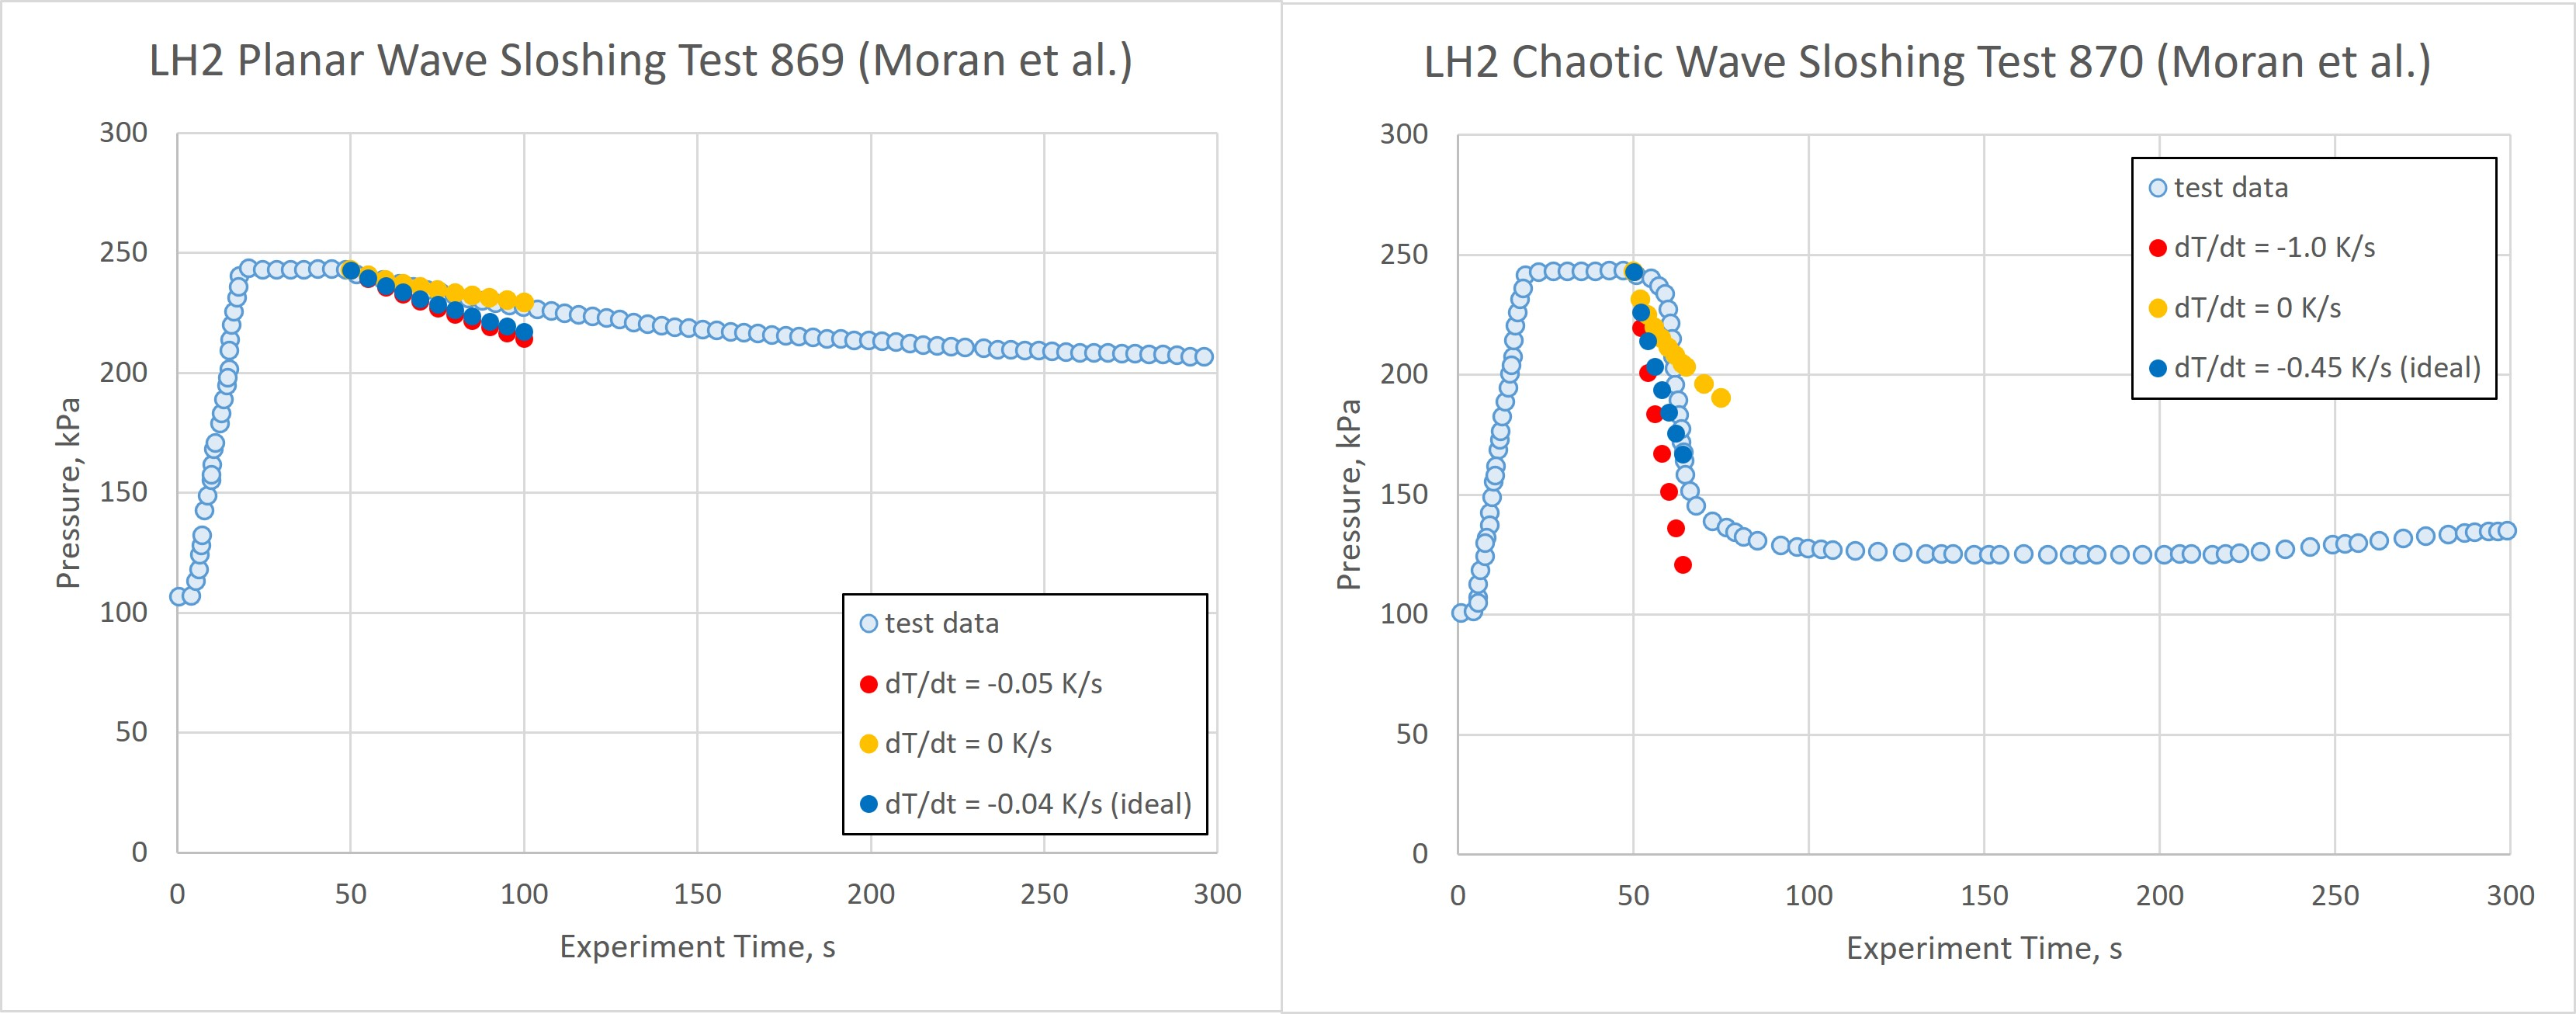

## Summary Results

In [4]:
# Print summary results
delta_p = (pressure - press_init) / 1000  # kPa, dpm
time_dp = delta_p / dpdt_max  # s, time interval for max dp/dt
b_R = wave_height / radius_tank  # b/R
print(case)
print("liquid thermal diffusivity =", "{:.2e}".format(diffus_sat), "m^2/s")
print("sloshing Reynolds number =", "{:.3e}".format(reynolds_slosh))
print("sloshing Nusselt number =", "{:.1f}".format(nusselt_slosh))
print("effective thermal diffusivity =", "{:.3e}".format(diffus_eff),
    "m^2/s")
print("Max pressure drop rate =", "{:.2f}".format(dpdt_max), "kPa/s")
print("Max pressure drop delta time =", "{:.1f}".format(time_dp), "s")
print("Pressure drop after", "{:.1f}".format(slosh_time), "s =", \
    "{:.1f}".format(delta_p), "kPa")
print("Wave height to tank radius ratio =", "{:.2f}".format(b_R))
print("Initial thermal boundary gradient thickness =", \
    "{:.1e}".format(grad_init), "m")
print("Greatest condensation velocity =", "{:.2e}".format(cond_velm), "m/s")
print("Greatest condensation rate =", "{:.2e}".format(condense_ratem), "kg/s")
print("Total condensed vapor after", "{:.1f}".format(slosh_time), "s =", 
        "{:.2e}".format(condense_amt), "kg")

LH2 Test 870, Moran et al.
liquid thermal diffusivity = 1.29e-07 m^2/s
sloshing Reynolds number = 4.902e+06
sloshing Nusselt number = 135.2
effective thermal diffusivity = 1.738e-05 m^2/s
Max pressure drop rate = -5.43 kPa/s
Max pressure drop delta time = 14.0 s
Pressure drop after 14.0 s = -76.0 kPa
Wave height to tank radius ratio = 0.60
Initial thermal boundary gradient thickness = 4.5e-03 m
Greatest condensation velocity = -1.56e-03 m/s
Greatest condensation rate = -2.86e-02 kg/s
Total condensed vapor after 14.0 s = -1.22e-01 kg


## Supplemental Calculations

### Ideal gas first approximation of temperature change (Gay-Lussac's law)

Notes:
* Use the calculations below when the vapor change rate during slosh is not known
* For chaotic slosh waves: run above analytical calculations once through with DT/dt = 0, then use new dT/dt calculated below to update vapor change rate input before running analytical calculations a second (and final) time
* For planer slosh waves: assuming dT/dt = 0 matches the pressure response profile better than using the below calculations

In [4]:
# Inputs 
temp_vap_old = temp_vap_init
press_old = press_init
time_delta = slosh_time

# Vapor temp at new pressure (ideal gas, Gay-Lussac's law: T2 = T1 * P2 / P1)
temp_vap_now = temp_vap_old * pressure /press_init
dT_dt = (temp_vap_now - temp_vap_old) / time_delta

print(case)
print("Average vapor temperature change", "{:.2f}".format(dT_dt), "K/s")

LH2 Test 870, Moran et al.
Average vapor temperature change -0.45 K/s


### Evolution of Thermal Boundary Layer with Time

Estimates temperature of the liquid at a chosen depth below the interface as a function of time from the start of ramp pressurization. See Ludwig et al. article for discussion of variance with actual thermal boundary layer evolution based on sensor data.

In [5]:
import math

# Inputs
liquid_height = 0.455  # m, dimension from bottom of tank to liquid interface
vert_location = 0.455 - wave_height  # m, location height to calculate temp
below_inter = liquid_height - vert_location # m, location depth below interface

# Calculate temperature at selected vertical location
temp_location = (temp_sat - temp_liq) * math.erfc((liquid_height 
                 - vert_location) / 2 / math.sqrt(diffus_eff 
                 * time_model)) + temp_liq

# Print temperature at selected location
print(case)
print("The temperature", "{:.3e}".format(below_inter), "m below the \
interface at experiment time", "{:.1f}".format(time_model), "s is:", \
"{:.2f}".format(temp_location), "K")

LH2 Test 870, Moran et al.
The temperature 4.476e-01 m below the interface at experiment time 64.0 s is: 20.25 K
